# Python Intro: Plotting

This notebook demonstrates data visualizations in Python with the plotting package matplotlib.

Required datasets:
- OurTempsRegions.csv (which should have been created by running 2_Data-Operations.ipynb)
- If no 'OurTempsRegions.csv' created, you can also use the 'TempsRegions.csv' data instead


In [11]:
import csv

In [12]:
# Import plotting library
from matplotlib import pyplot as plt

In [13]:
# import data from CSV file
all_temps_regions = []
with open('TempsRegions.csv', 'rU') as my_temps_file:
    my_temps_reader = csv.DictReader(my_temps_file)
    for row in my_temps_reader:
        all_temps_regions.append(row)

### Scatterplot

[31.2, 32.9, 33.6, 35.4, 34.3, 37.4, 38.4, 40.7, 41.7, 40.5, 39.7, 31.0, 25.0, 26.3, 33.9, 43.7, 42.3, 39.8, 41.8, 38.1, 39.0, 30.8, 44.2, 39.7, 42.7, 43.1, 45.9, 39.3, 47.1, 41.9, 43.5, 39.8, 35.1, 42.6, 40.8, 35.9, 36.4, 47.1, 39.2, 42.3, 35.9, 45.6, 40.9, 40.9, 33.3, 36.7, 35.6, 29.4, 30.1, 41.1, 45.0, 37.0, 48.1, 48.1, 43.4, 43.3, 41.2]
[88.5, 86.8, 112.5, 92.8, 118.7, 122.1, 123.0, 105.3, 73.4, 76.3, 77.5, 82.3, 82.0, 80.7, 85.0, 117.1, 88.0, 86.9, 93.6, 97.6, 86.5, 90.2, 70.5, 77.3, 71.4, 83.9, 93.9, 90.5, 112.4, 96.1, 71.9, 75.3, 106.7, 73.7, 74.6, 81.5, 78.9, 101.0, 85.0, 82.5, 97.5, 123.2, 77.8, 75.5, 80.8, 87.6, 101.9, 95.5, 95.9, 112.3, 73.9, 76.6, 122.5, 117.9, 90.2, 88.1, 104.9]


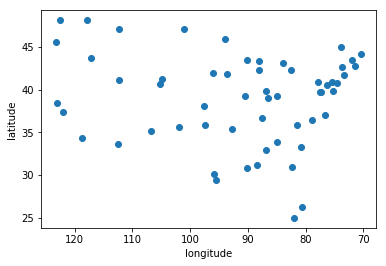

In [14]:
# just plt.plot() plots (x, y) pairs given [x], [y] lists
plt.figure()
y = [float(city['lat']) for city in all_temps_regions]
print y
x = [float(city['lng']) for city in all_temps_regions]
print x
plt.plot(x, y, 'o')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.gca().invert_xaxis() # gca = get current axes
plt.show()
plt.close()

In [15]:
# pick 4 cities, get temperatues
cities = ['San Francisco', 'Miami', 'New York', 'Boston']
temps = {}
for city_info in all_temps_regions:
    if city_info['city'] in cities:
        temps[city_info['city']] = float(city_info['temp'])
bars = []
for city in cities:
    bars.append(temps[city])
print bars

[42.0, 58.0, 27.0, 23.0]


### Bar Chart

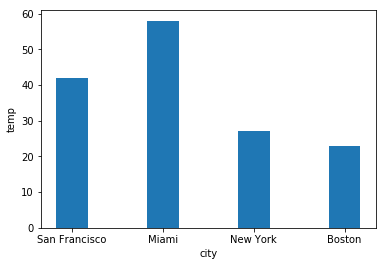

In [16]:
# plot temperatures as barchart
plt.figure()
n = len(bars)
width = 0.35
plt.bar(range(n), bars, width)
plt.xlabel('city')
plt.ylabel('temp')
plt.xticks(range(n), cities)
plt.show()
plt.close()

### Pie Chart

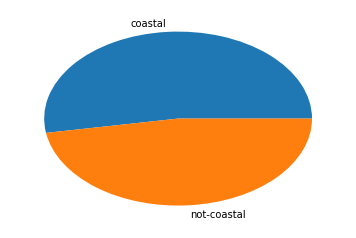

In [17]:
# Number of coastal cities vs non-coastal as piechart
num_coastal = len([city_info['city'] for city_info in all_temps_regions if city_info['coastal'] == 'Y'])
num_not = len(all_temps_regions) - num_coastal
plt.figure()
sizes = [num_coastal, num_not]
labels = ['coastal', 'not-coastal']
plt.pie(sizes, labels=labels)
plt.show()
plt.close()

### Scatterplot with different colors

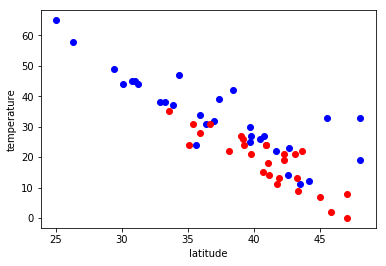

In [18]:
# temp vs latitude scatterplot
# one set for coastal, one set for non-coastal
plt.figure()
y_c = [float(city['temp']) for city in all_temps_regions if city['coastal'] == 'Y']
x_c = [float(city['lat']) for city in all_temps_regions if city['coastal'] == 'Y']
y_n = [float(city['temp']) for city in all_temps_regions if city['coastal'] == 'N']
x_n = [float(city['lat']) for city in all_temps_regions if city['coastal'] == 'N']
plt.plot(x_c, y_c, 'o', color='blue')
plt.plot(x_n, y_n, 'o', color='red')
plt.xlabel('latitude')
plt.ylabel('temperature')
plt.show()
plt.savefig("scatter.png")
plt.close()